In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import prepare

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
def read():
    X = pd.read_csv(os.path.join(settings.PROCESSED_DIR, settings.PROCESSED_X), header=0)
    y = pd.read_csv(os.path.join(settings.PROCESSED_DIR, settings.PROCESSED_Y), header=0)
    X['Date'] = pd.to_datetime(X['Date'], format='%Y-%m-%d')
    return X, y

In [5]:
def plot_trend(x, predict, y, title):
    plt.xticks(rotation=45)
    plt.plot_date(x, y, fmt='b-', xdate=True, ydate=False, label='Real value')
    plt.plot_date(x, predict, fmt='r-', xdate=True, ydate=False, label='Predicted value')
    plt.legend(loc='upper center')
    plt.ylabel('Close prices')
    plt.title(title)
    plt.grid()
    plt.show()

In [6]:
def modify(X, columns):
    columns.append('Date2num')
    returnX = X.loc[:, columns]
    return returnX

In [7]:
def predict_and_plot(X, date):
    # m - number of examples
    # n - number of features
    m, n = X.shape

    # test set is 30%
    # train set is 70%
    X_test = X.loc[:np.floor(m*0.3)]
    X_train = X.loc[np.floor(m*0.3)+1:]

    y_test = y.loc[:np.floor(m*0.3)]
    y_train = y.loc[np.floor(m*0.3)+1:]

    date_test = date.loc[:np.floor(m*0.3)]

    # Create linear regression object
    lr = LinearRegression()

    # Train the model using the training sets
    lr.fit(X_train, y_train)

    # The coefficients
    print('Coefficients: \n', lr.coef_)
    # The mean square error
    print("Number of variables: %d; Residual sum of squares: %.2f; Variance score: %.2f"
          % (n, np.mean((lr.predict(X_test) - y_test) ** 2), lr.score(X_test, y_test)))

    # Plot outputs
    plot_trend(date_test, lr.predict(X_test), y_test, 'Facebook Inc(NASDAQ:FB)')
    plot_trend(date, lr.predict(X), y, 'Facebook Inc(NASDAQ:FB)')

Coefficients: 
 [[0.067808]]
Number of variables: 1; Residual sum of squares: 79.09; Variance score: 0.72


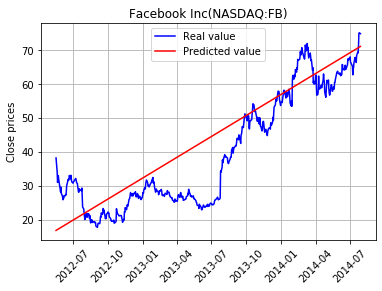

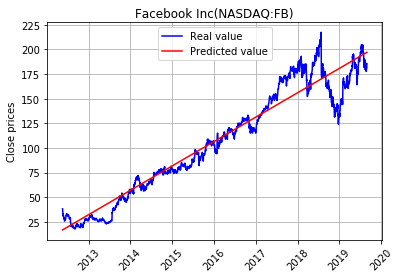

In [8]:
if __name__ == "__main__":
    prices = prepare.read()
    prepare.write(prices)

    X, y = read()
    X['Date2num'] = X['Date'].apply(lambda x: mdates.date2num(x))
    date = X.loc[:, ['Date']]
    del X['Date']

    # predict with one variable - time
    X1 = modify(X, [])
    predict_and_plot(X1, date)

    # predict with two variables - time and open price the same day
    X2 = modify(X, ['Open'])
    #predict_and_plot(X2, date)

    X3 = modify(X, ['Open','OpenPrev','ClosePrev'])
    #predict_and_plot(X3, date)

    X5 = modify(X, ['Open','OpenPrev','ClosePrev','OpenPrev2','ClosePrev2'])
    #predict_and_plot(X5, date)

    X7 = modify(X, ['Open','OpenPrev','ClosePrev','OpenPrev2','ClosePrev2','OpenPrev3','ClosePrev3'])
    #predict_and_plot(X7, date)

    X9 = modify(X, ['Open','OpenPrev','ClosePrev','OpenPrev2','ClosePrev2','OpenPrev3','ClosePrev3','OpenPrev4','ClosePrev4'])
    #predict_and_plot(X9, date)

    X11 = modify(X, ['Open','OpenPrev','ClosePrev','OpenPrev2','ClosePrev2','OpenPrev3','ClosePrev3','OpenPrev4','ClosePrev4','OpenPrev5','ClosePrev5'])
    #predict_and_plot(X11, date)